# Further Cleaning of Taiwanese Credit Default Data

This notebook expands upon part 1 of the exploratory data analysis and looks at: 
- Recode categorical variables
- Check the distribution of variables other than card limit amount (refer to part 1)
- Examine correlation matrix
- Export semi-cleaned data

**TLDR from this analysis:**
- Recoded, education, marriage, sex, and default variables to proper categorical names.
- There are more women than men in this data, no race variable, and more singles than married people.
- LIMIT_BAL and PAY_0 are most correlated with default.

### Variable Description

>This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
>
>X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
>
>X2: Gender (1 = male; 2 = female).
>
>X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
>
>X4: Marital status (1 = married; 2 = single; 3 = others).
>
>X5: Age (year).
>
>X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
>
>X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
>
>X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load in Data**

In [31]:
default = pd.read_excel(
    "../data/default of credit card clients.xls",
    header = 1
)

## Recode Categorial Variables

A lot of categorical variables have numerical encodings even though their levels are nominal. Therefore, we will re-encode them into categories here.

Specifically, we re-encoded the *sex*, *marriage*, and *education* variables.

Also, I didn't like how long the `default payment next month` name was like so I changed it to `default`.

In [32]:
### Encode Sex Variables
sex_mapping = {
    1: "Male",
    2: "Female"
}
# Map the sex column back to it
default = default.assign(SEX = default.SEX.map(sex_mapping))

### Encode Education Variables
edu_mapping = {
    1: "Graduate",
    2: "Undergraduate",
    3: "High School",
    4: "Other",
    0: "Unknown",
    5: "Unknown",
    6: "Unknown"
}
# Map the sex column back to it
default = default.assign(EDUCATION = default.EDUCATION.map(edu_mapping))

### Encode Marriage Variables
marriage_mapping = {
    0: "Unknown",
    1: "Married",
    2: "Single",
    3: "Other"
}
# Map the sex column back to it
default = default.assign(MARRIAGE = default.MARRIAGE.map(marriage_mapping))

### Encode default variable
default_mapping = {
    0: "No",
    1: "Yes"
}
# Apply the mapping
default = default.assign(default = default["default payment next month"].map(default_mapping))

## Distribution of variables

### Discreet Variables

We first look at the distribution of categorical variables to check for funny business. 

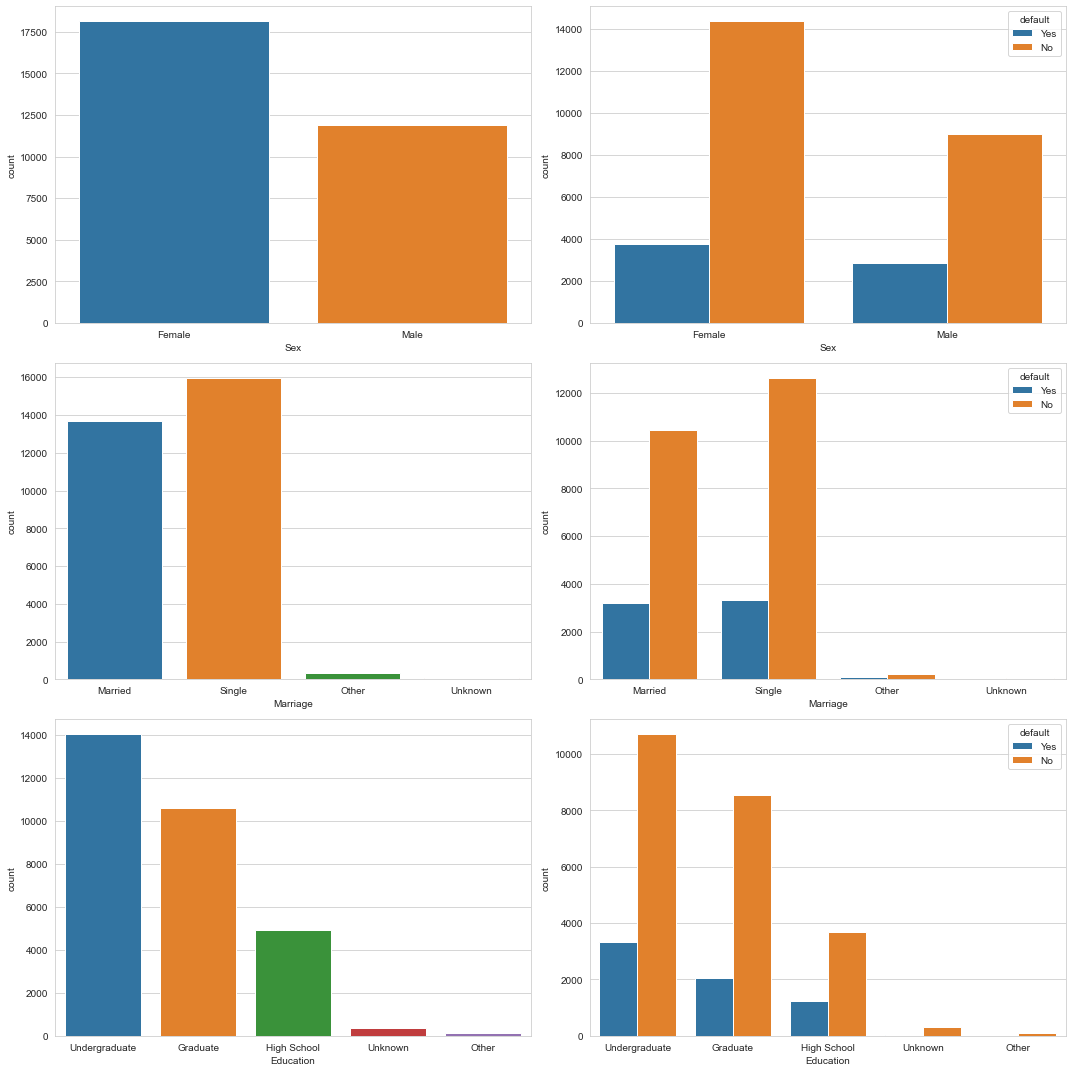

In [109]:
## Check the distribution of marital status and gender
fig, axes = plt.subplots(3,2,figsize = (15,15))

sns.set_style("whitegrid")

## Plot the countplots
sns.countplot(x = "SEX", data = default, ax = axes[0,0])
sns.countplot(x = "MARRIAGE", data = default, ax = axes[1,0])
sns.countplot(x = "EDUCATION", data = default, ax = axes[2,0])
sns.countplot(x = "SEX", hue = "default", data = default, ax = axes[0,1])
sns.countplot(x = "MARRIAGE", hue = "default", data = default, ax = axes[1,1])
sns.countplot(x = "EDUCATION", hue = "default", data = default, ax = axes[2,1])

axes[0,1].set_xlabel("Sex")
axes[1,1].set_xlabel("Marriage")
axes[2,1].set_xlabel("Education")
axes[0,0].set_xlabel("Sex")
axes[1,0].set_xlabel("Marriage")
axes[2,0].set_xlabel("Education")

plt.tight_layout()
plt.show()

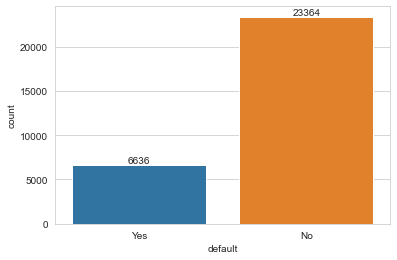

In [108]:
ax = sns.countplot(x='default', data=default)
ax.bar_label(ax.containers[0])
plt.show()

> We can learn from this analysis that the dataset has information on more female borrowers compared to male borrowers. It has more single people than married people. There are also a small portion of people who are either mislabeled or unknown in the marriage and education variables.

### Continuous Variables

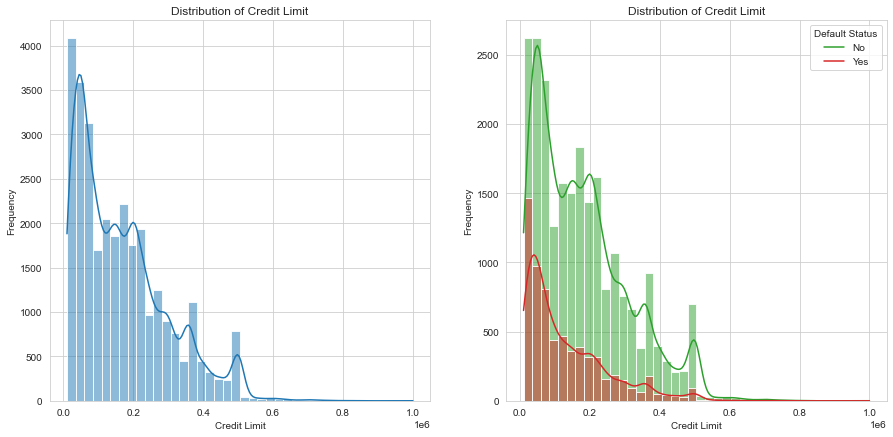

In [56]:
## Limit Balance, and distribution of Limit Balance by default status
fig, axes = plt.subplots(1,2,figsize = (15,7))

## Plot the overall balance limit plot
sns.histplot(default['LIMIT_BAL'], ax=axes[0], bins=40, kde=True)
axes[0].set_title('Distribution of Credit Limit')
axes[0].set_xlabel('Credit Limit')
axes[0].set_ylabel('Frequency')

# Plot the balance limit by default status
sns.histplot(
    x = "LIMIT_BAL", hue = "default", 
    ax=axes[1], bins=40, kde=True, 
    data = default, 
    palette= ['tab:red', 'tab:green'])
axes[1].set_title('Distribution of Credit Limit')
axes[1].set_xlabel('Credit Limit')
axes[1].set_ylabel('Frequency')
axes[1].legend(title = "Default Status", labels = ["No", "Yes"])

plt.show()

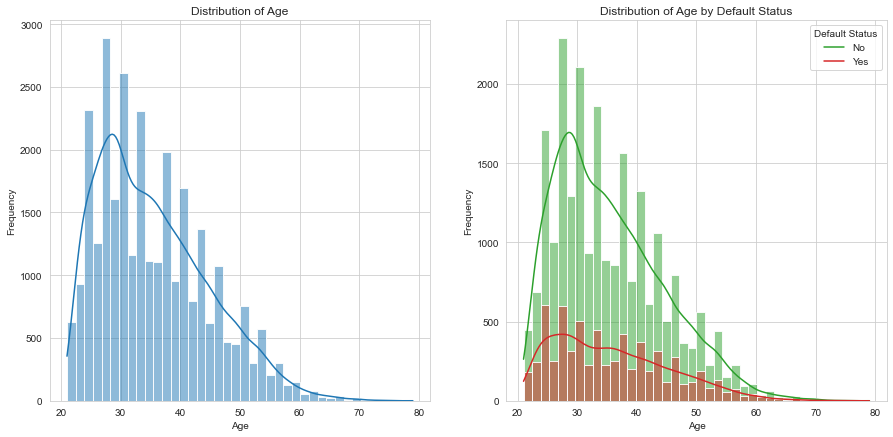

In [58]:
## Limit Balance, and distribution of Limit Balance by default status
fig, axes = plt.subplots(1,2,figsize = (15,7))

## Plot the overall age plot
sns.histplot(default['AGE'], ax=axes[0], bins=40, kde=True)
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Plot the distribution by default status
sns.histplot(
    x = "AGE", hue = "default", 
    ax=axes[1], bins=40, 
    kde=True, data = default,
    palette= ['tab:red', 'tab:green'])
axes[1].set_title('Distribution of Age by Default Status')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].legend(title = "Default Status", labels = ["No", "Yes"])

plt.show()

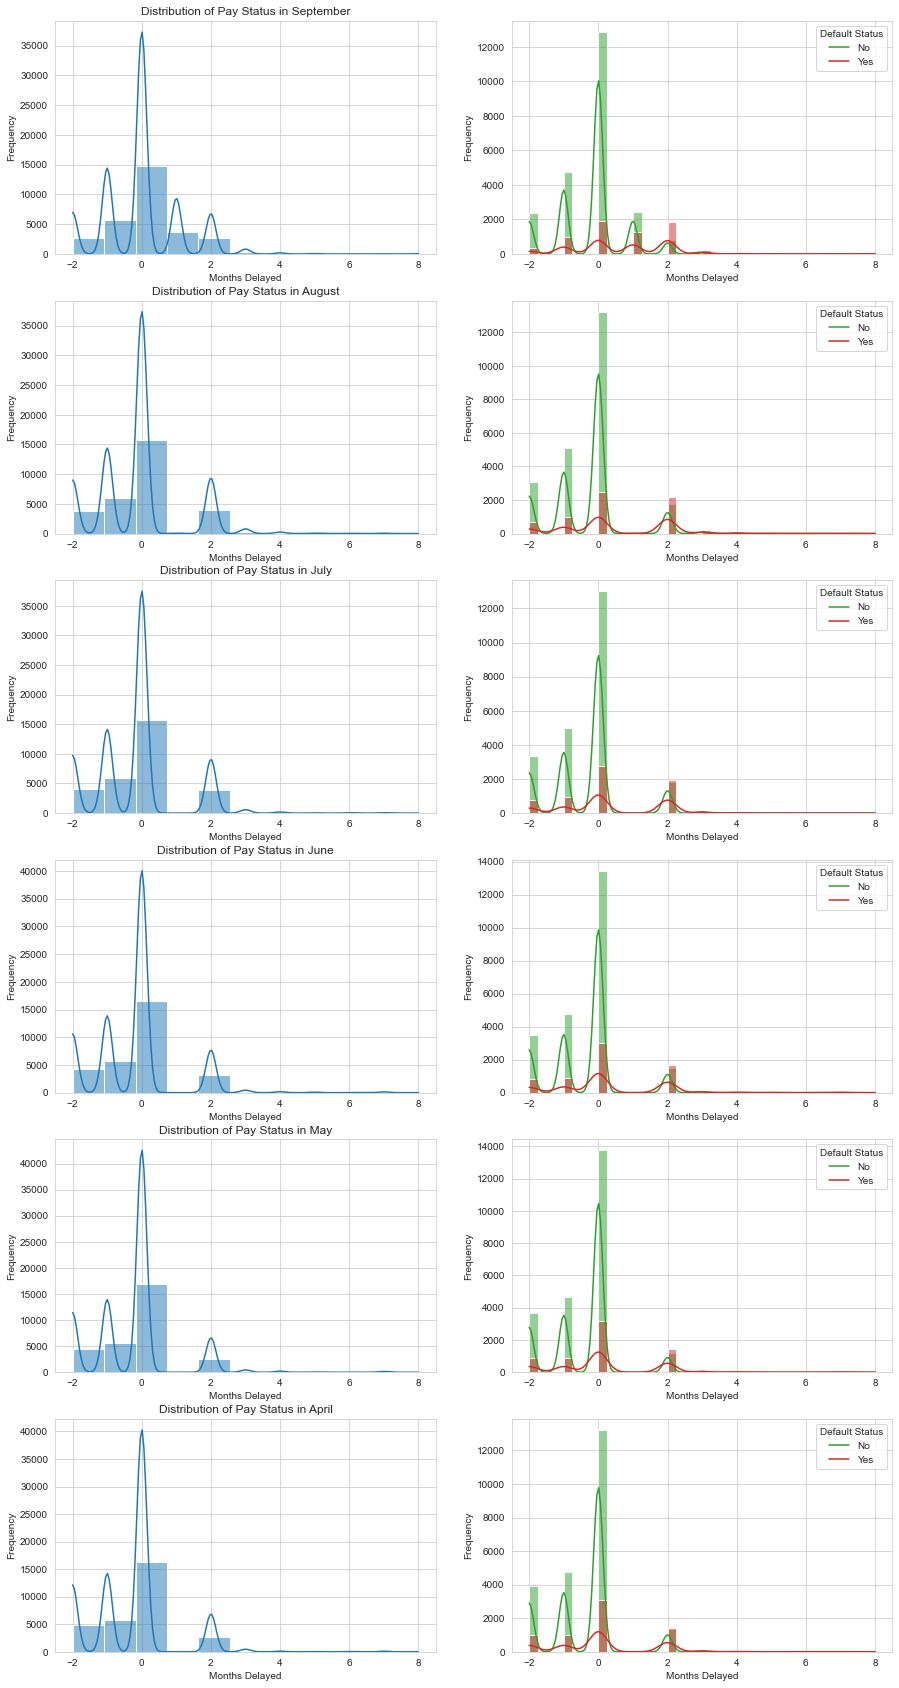

In [64]:
## Repayment status by months
## Limit Balance, and distribution of Limit Balance by default status
fig, axes = plt.subplots(6,2,figsize = (15,30))

pay_status_index = [0,2,3,4,5,6]
pay_status_names = ["September", "August", "July", "June", "May", "April"]

## Plot the overall age plot
for row, i in enumerate(pay_status_index):
    
    # Plot overall histogram
    sns.histplot(default[f"PAY_{i}"], ax = axes[row,0], bins = 11, kde = True)
    axes[row,0].set_title(f"Distribution of Pay Status in {pay_status_names[row]}")
    axes[row,0].set_xlabel('Months Delayed')
    axes[row,0].set_ylabel('Frequency')
    
    # Plot
    sns.histplot(
        x = f"PAY_{i}", hue = "default", 
        ax=axes[row,1], bins=40, 
        kde=True, data = default,
        palette= ['tab:red', 'tab:green'])
    axes[row,1].set_xlabel('Months Delayed')
    axes[row,1].set_ylabel('Frequency')
    axes[row,1].legend(title = "Default Status", labels = ["No", "Yes"])

In [114]:
default.describe()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


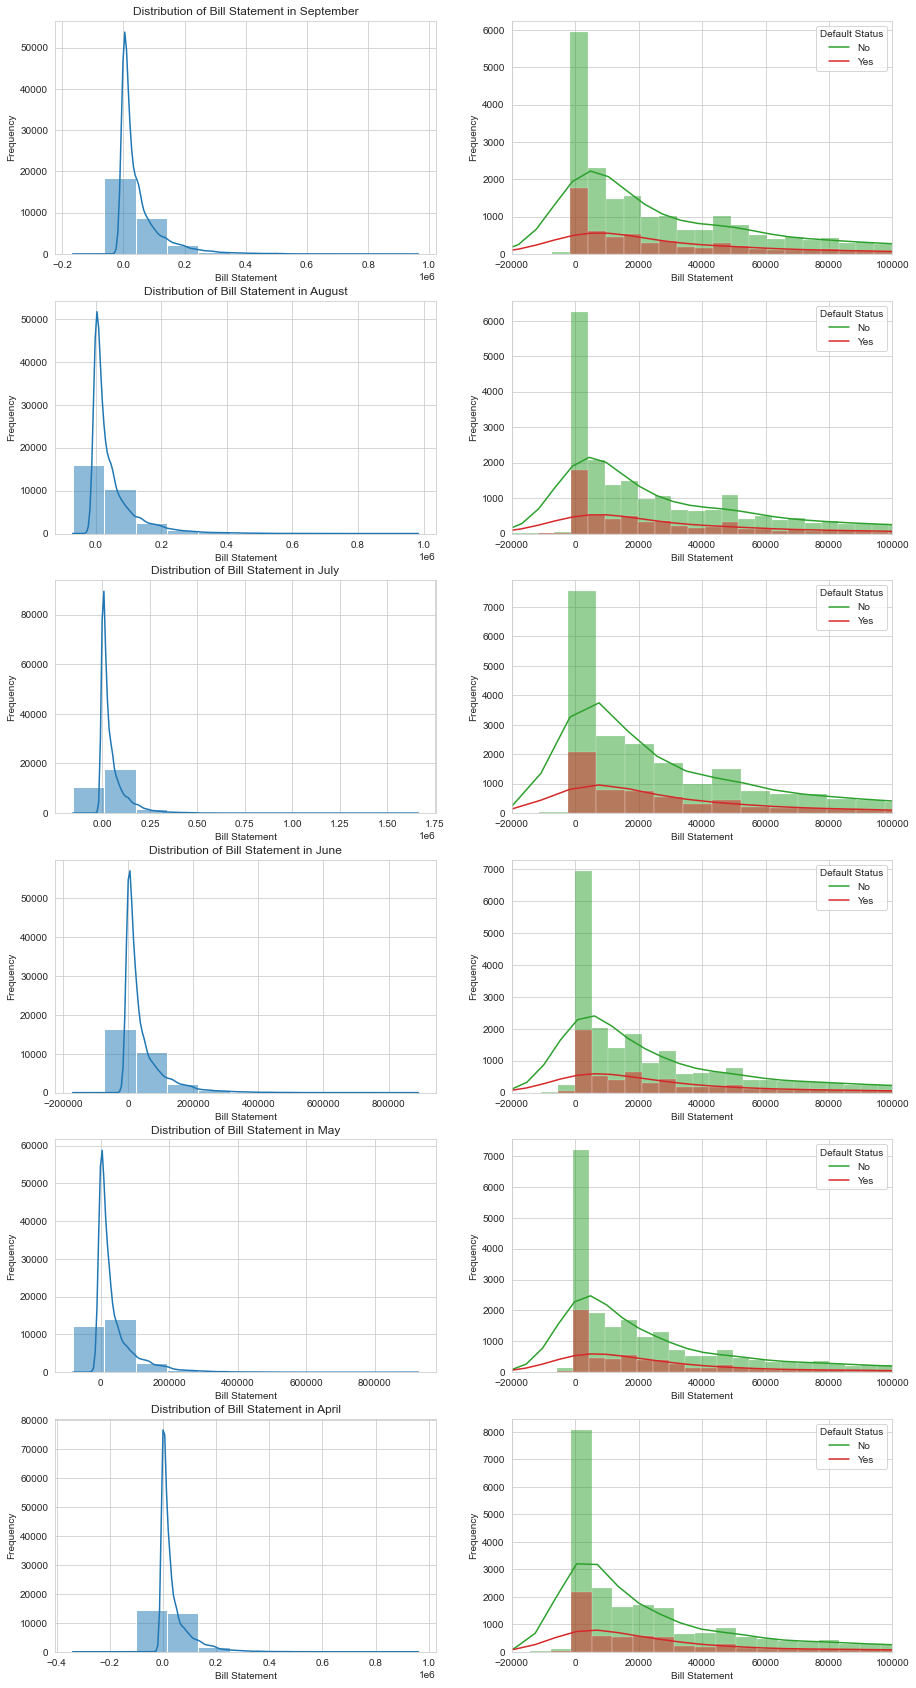

In [80]:
## Repayment status by months
## Limit Balance, and distribution of Limit Balance by default status
fig, axes = plt.subplots(6,2,figsize = (15,30))

pay_status_index = [1,2,3,4,5,6]
pay_status_names = ["September", "August", "July", "June", "May", "April"]

## Plot the overall age plot
for row, i in enumerate(pay_status_index):
    
    # Plot overall histogram
    sns.histplot(default[f"BILL_AMT{i}"], ax = axes[row,0], bins = 11, kde = True)
    axes[row,0].set_title(f"Distribution of Bill Statement in {pay_status_names[row]}")
    axes[row,0].set_xlabel('Bill Statement')
    axes[row,0].set_ylabel('Frequency')
    
    # Plot
    sns.histplot(
        x = f"BILL_AMT{i}", hue = "default", 
        ax=axes[row,1], bins=200, 
        kde=True, data = default,
        palette= ['tab:red', 'tab:green'])
    axes[row,1].set_xlim(-20000, 100000)
    axes[row,1].set_xlabel('Bill Statement')
    axes[row,1].set_ylabel('Frequency')
    axes[row,1].legend(title = "Default Status", labels = ["No", "Yes"])

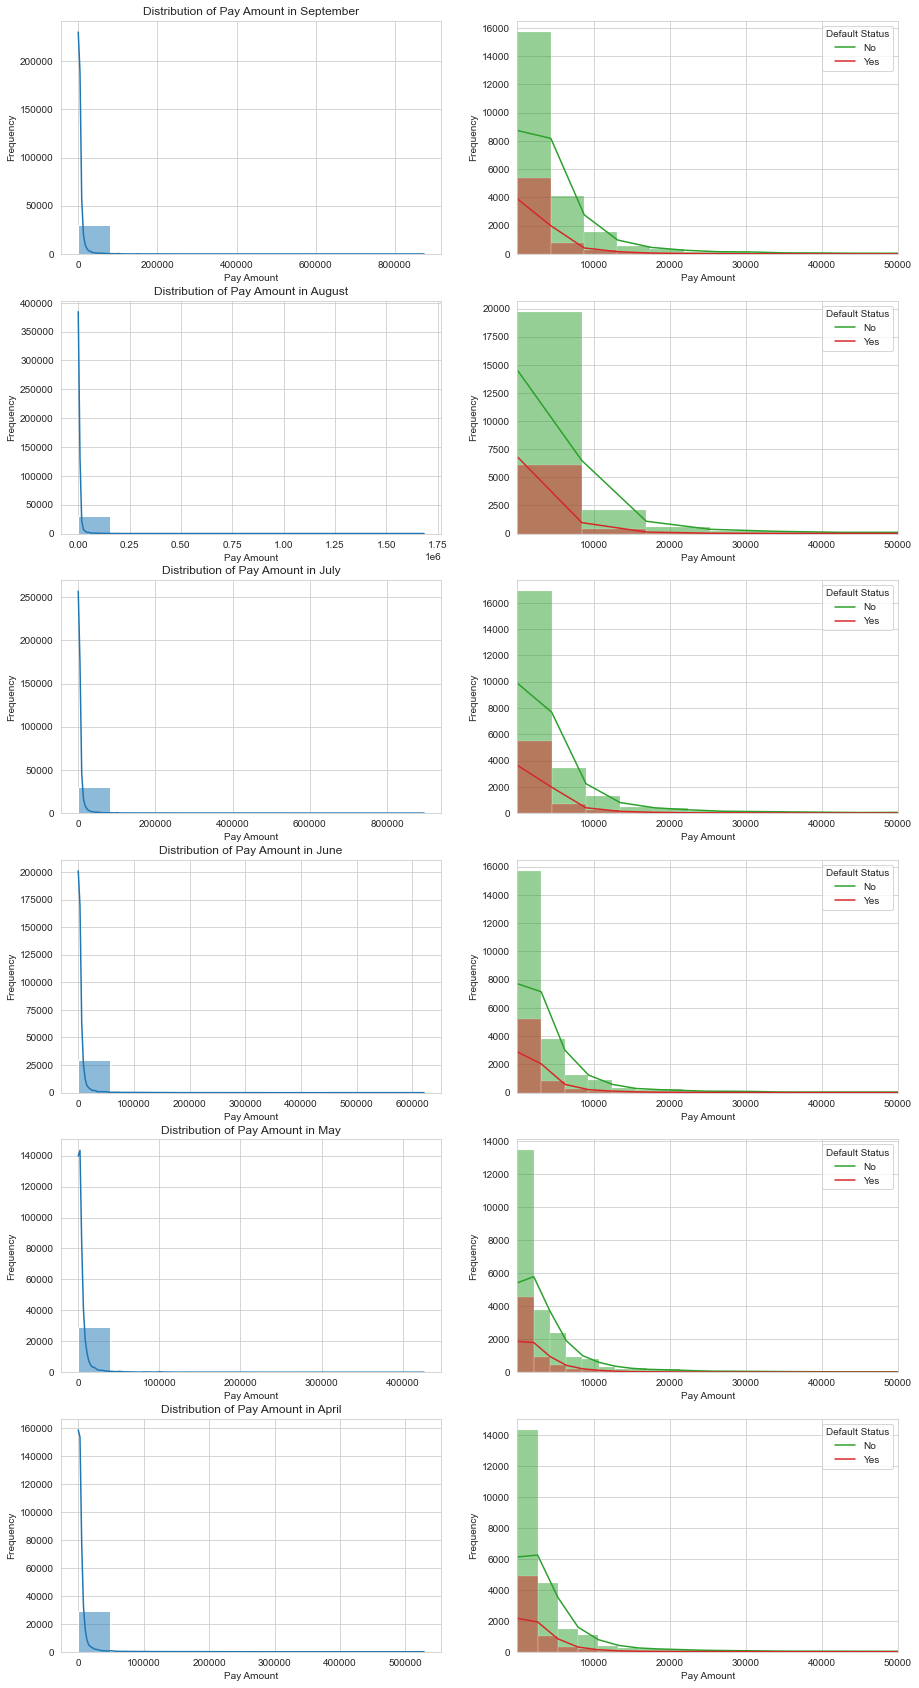

In [82]:
## Repayment status by months
## Limit Balance, and distribution of Limit Balance by default status
fig, axes = plt.subplots(6,2,figsize = (15,30))

pay_status_index = [1,2,3,4,5,6]
pay_status_names = ["September", "August", "July", "June", "May", "April"]

## Plot the overall age plot
for row, i in enumerate(pay_status_index):
    
    # Plot overall histogram
    sns.histplot(default[f"PAY_AMT{i}"], ax = axes[row,0], bins = 11, kde = True)
    axes[row,0].set_title(f"Distribution of Pay Amount in {pay_status_names[row]}")
    axes[row,0].set_xlabel('Pay Amount')
    axes[row,0].set_ylabel('Frequency')
    
    # Plot
    sns.histplot(
        x = f"PAY_AMT{i}", hue = "default", 
        ax=axes[row,1], bins=200, 
        kde=True, data = default,
        palette= ['tab:red', 'tab:green'])
    axes[row,1].set_xlim(9, 50000)
    axes[row,1].set_xlabel('Pay Amount')
    axes[row,1].set_ylabel('Frequency')
    axes[row,1].legend(title = "Default Status", labels = ["No", "Yes"])

## Correlation Matrix

We check the correlation matrix to see which variables are more correlated with default.

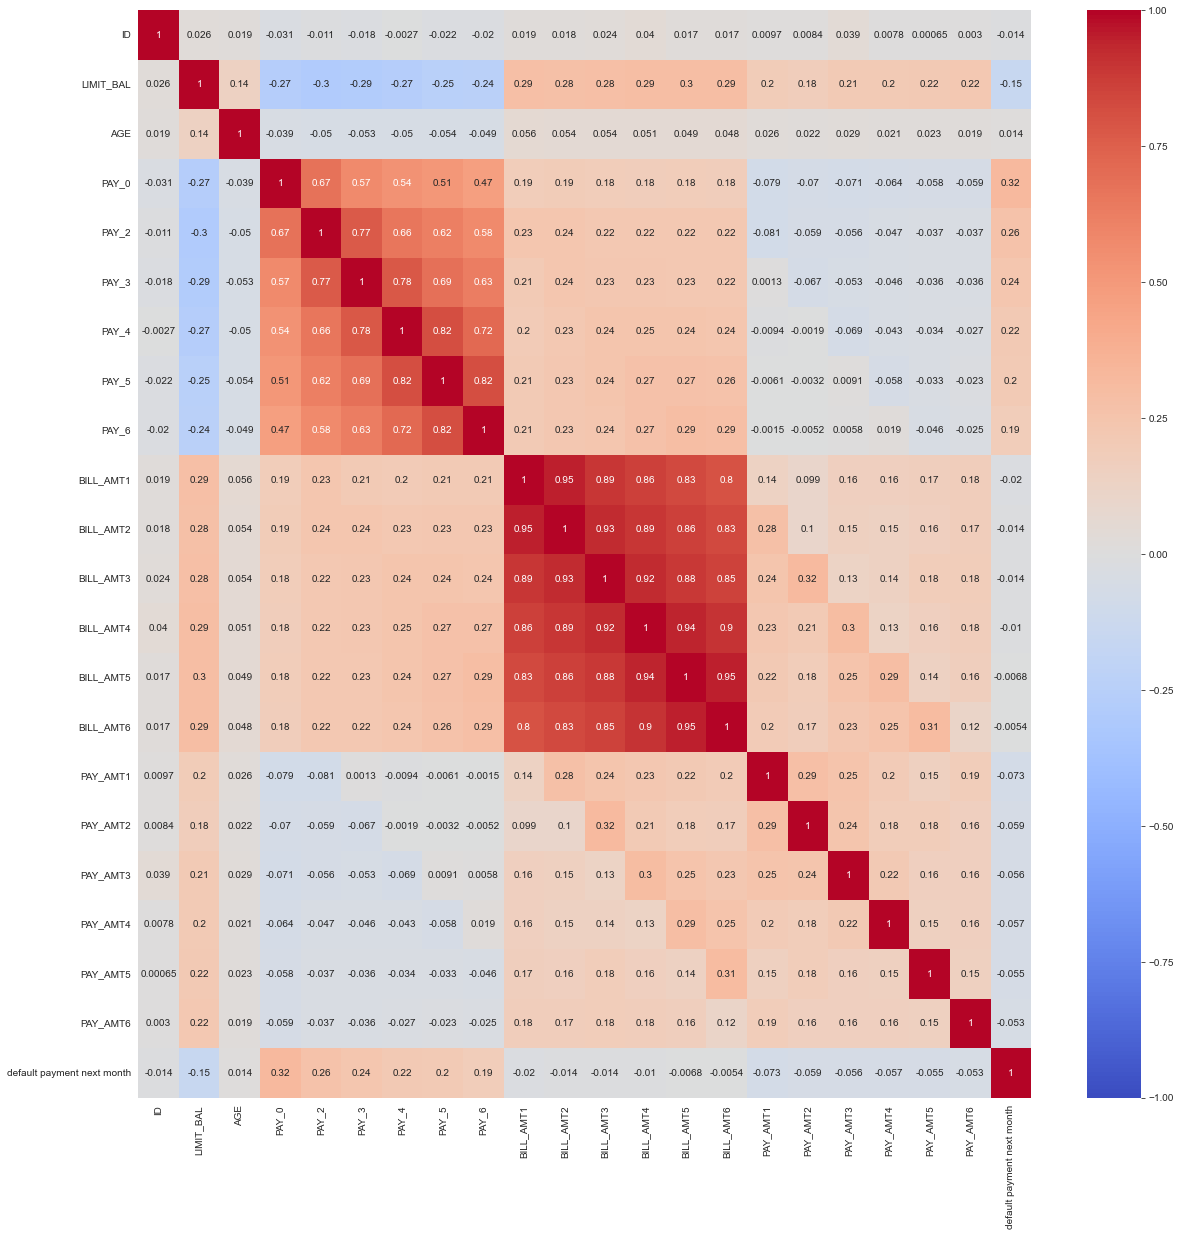

In [96]:
# Get correlation matrix
corr_mat = default.corr(numeric_only=True)

# plotting correlation heatmap
coolwarm = sns.color_palette("coolwarm", as_cmap=True)
fig, ax = plt.subplots(figsize = (20,20))
dataplot = sns.heatmap(corr_mat, cmap=coolwarm, annot=True, vmin = -1, vmax=1)
# displaying heatmap
plt.show()

Looking at the correlation matrix, we notice two remakable points:
- The payment status in September is the best standalone linear predictor for default.
- Limit Balance has a moderately negative association with default status.

### Export Clean Data

- The noticeable issues in the data were the unknown classes in the marriage and education variables, so we remove the observations with those unknown values.
- We also move that one datapoint that had issues with the PAY variable.

In [105]:
## Clean unknown data
default_clean = default.copy()
default_clean = default_clean.loc[default_clean["EDUCATION"] != "Unknown"]
default_clean = default_clean.loc[default_clean["MARRIAGE"] != "Unknown"]
default_clean = default_clean.loc[default_clean["ID"] != 8655]

# Write to CSV
default_clean.to_csv("../data/default_clean_v1.csv")

In [106]:
print(default.shape)
print(default_clean.shape)

(30000, 26)
(29600, 26)
